# Bank Customer Churn Dataset

# 1.Predictive Modeling

## 1.1 Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1.2 Loading Dataset

In [35]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

print(df.head())
print(df.info())


   customer_id  credit_score country  gender  age  tenure   balance  \
0     15634602           619  France  Female   42       2      0.00   
1     15647311           608   Spain  Female   41       1  83807.86   
2     15619304           502  France  Female   42       8 159660.80   
3     15701354           699  France  Female   39       1      0.00   
4     15737888           850   Spain  Female   43       2 125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          

# 1.3 Data Preprocessing

In [36]:
# Handle missing values if any
df = df.dropna()

# Assuming df is your DataFrame
df = df.drop('customer_id', axis=1)

# Separate features (X) and target variable (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Convert categorical variables to numerical using label encoding (since there are only a few categories)
# If you have more than a few categories, you might consider one-hot encoding.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['country'] = label_encoder.fit_transform(X['country'])
X['gender'] = label_encoder.fit_transform(X['gender'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1.4 Feature Scaling

In [37]:
# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 1.5 Build and Train the Model

In [38]:
# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

# 1.6 Predictions

In [39]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


# 1.7 Evaluate the Model

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier instance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Now, you can make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate and print accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Display confusion matrix and classification report for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)

print('\nTraining Set:')
print('Confusion Matrix:')
print(conf_matrix_train)
print('\nClassification Report:')
print(class_report_train)

# Display confusion matrix and classification report for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

print('\nTesting Set:')
print('Confusion Matrix:')
print(conf_matrix_test)
print('\nClassification Report:')
print(class_report_test)


Training Accuracy: 1.00
Testing Accuracy: 0.86

Training Set:
Confusion Matrix:
[[6356    0]
 [   0 1644]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6356
           1       1.00      1.00      1.00      1644

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000


Testing Set:
Confusion Matrix:
[[1546   61]
 [ 210  183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



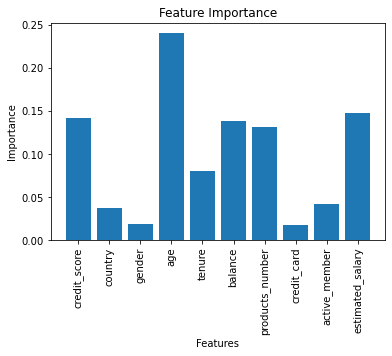

In [44]:
# Feature Importance
feature_importance = model.feature_importances_
features = X.columns

# Visualize feature importance with vertically oriented x-axis labels
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

# Rotate x-axis labels
plt.xticks(rotation='vertical')

plt.show()


# Bonus 1. Testing KNN Method

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming you have X and y already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Case 1: Without Scaling
knn_without_scaling = KNeighborsClassifier(n_neighbors=5)
knn_without_scaling.fit(X_train, y_train)
y_pred_without_scaling = knn_without_scaling.predict(X_test)
accuracy_without_scaling = accuracy_score(y_test, y_pred_without_scaling)
print(f'Accuracy without scaling: {accuracy_without_scaling:.2f}')

# Case 2: Standard Scaling
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

knn_standard_scaling = KNeighborsClassifier(n_neighbors=5)
knn_standard_scaling.fit(X_train_standard, y_train)
y_pred_standard_scaling = knn_standard_scaling.predict(X_test_standard)
accuracy_standard_scaling = accuracy_score(y_test, y_pred_standard_scaling)
print(f'Accuracy with standard scaling: {accuracy_standard_scaling:.2f}')

# Case 3: Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

knn_minmax_scaling = KNeighborsClassifier(n_neighbors=5)
knn_minmax_scaling.fit(X_train_minmax, y_train)
y_pred_minmax_scaling = knn_minmax_scaling.predict(X_test_minmax)
accuracy_minmax_scaling = accuracy_score(y_test, y_pred_minmax_scaling)
print(f'Accuracy with min-max scaling: {accuracy_minmax_scaling:.2f}')


Accuracy without scaling: 0.76
Accuracy with standard scaling: 0.84
Accuracy with min-max scaling: 0.82


# Bonus 2. Compare with StandardScaler and MinMaxScaler

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have X, y already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Train and evaluate a RandomForestClassifier on both scaled datasets
model_standard = RandomForestClassifier(random_state=42)
model_standard.fit(X_train_standard, y_train)
y_pred_standard = model_standard.predict(X_test_standard)
accuracy_standard = accuracy_score(y_test, y_pred_standard)
print(f'Accuracy with Standard Scaling: {accuracy_standard:.2f}')

model_minmax = RandomForestClassifier(random_state=42)
model_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = model_minmax.predict(X_test_minmax)
accuracy_minmax = accuracy_score(y_test, y_pred_minmax)
print(f'Accuracy with Min-Max Scaling: {accuracy_minmax:.2f}')


Accuracy with Standard Scaling: 0.86
Accuracy with Min-Max Scaling: 0.87


# Bonus 3. USE Grid Search

In [13]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 200}
Accuracy: 0.87


# Bonus 4.Lazy Classifier

In [46]:
#pip install lazypredict

In [47]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming you have X_train, X_test, y_train, y_test already defined

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create LazyClassifier model
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Display the models and their performance
print(models)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.06it/s]

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.86               0.73     0.73      0.85   
LGBMClassifier                     0.87               0.73     0.73      0.86   
RandomForestClassifier             0.86               0.71     0.71      0.85   
AdaBoostClassifier                 0.85               0.71     0.71      0.84   
ExtraTreesClassifier    

In [48]:
sorted_models = models.sort_values(by='Accuracy', ascending=False)

# Display the sorted models
print(sorted_models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.87               0.73     0.73      0.86   
RandomForestClassifier             0.86               0.71     0.71      0.85   
ExtraTreesClassifier               0.86               0.71     0.71      0.85   
XGBClassifier                      0.86               0.73     0.73      0.85   
SVC                                0.86               0.67     0.67      0.84   
AdaBoostClassifier                 0.85               0.71     0.71      0.84   
BaggingClassifier                  0.85               0.69     0.69      0.83   
KNeighborsClassifier               0.84               0.67     0.67      0.82   
QuadraticDiscriminantAnalysis      0.83               0.63     0.63      0.80   
GaussianNB                         0.83               0.61     0.61      0.79   
LogisticRegression          

# 2. Exploratory Data Analysis (EDA)

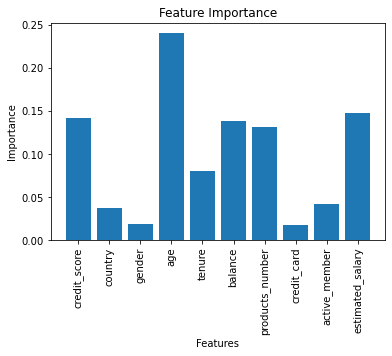

In [70]:
# Feature Importance
feature_importance = model.feature_importances_
features = X.columns

# Visualize feature importance with vertically oriented x-axis labels
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

# Rotate x-axis labels
plt.xticks(rotation='vertical')

plt.show()

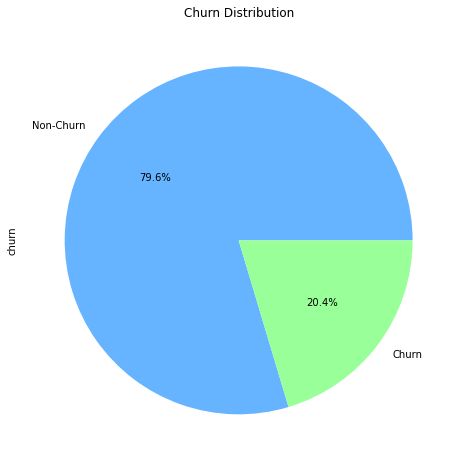

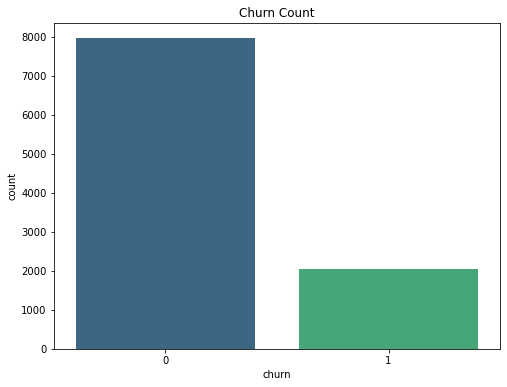

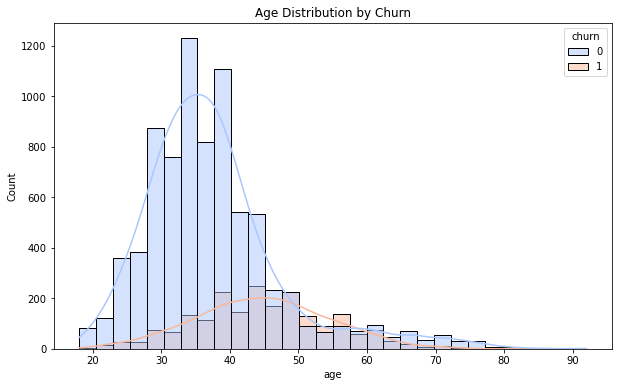

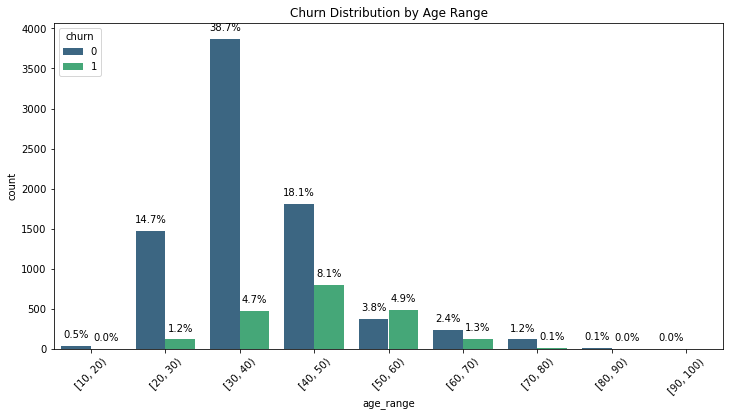

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie Chart for Churn Distribution
plt.figure(figsize=(8, 8))
df['churn'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Churn', 'Churn'], colors=['#66b3ff','#99ff99'])
plt.title('Churn Distribution')
plt.show()

# Countplot for Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df, palette='viridis')
plt.title('Churn Count')
plt.show()

# Histogram for Numeric Feature (e.g., 'age')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='churn', bins=30, kde=True, palette='coolwarm')
plt.title('Age Distribution by Churn')
plt.show()

# Create a new categorical variable for age ranges
df['age_range'] = pd.cut(df['age'], bins=np.arange(10, 101, 10), right=False)

# Countplot for Age Range vs. Churn
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='age_range', hue='churn', data=df, palette='viridis')
plt.title('Churn Distribution by Age Range')
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
total_height = len(df['age_range'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01 * total_height
    ax.annotate(percentage, (x, y), ha='center')

plt.show()


<Figure size 2880x1152 with 0 Axes>

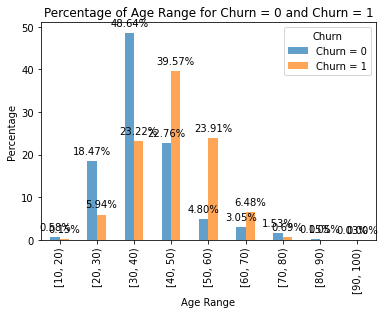

In [111]:
# Assuming 'df' is your original DataFrame
df_copy = df.copy()

# Filter data for Churn = 0 and Churn = 1
churn_0_data = df_copy[df_copy['churn'] == 0]
churn_1_data = df_copy[df_copy['churn'] == 1]

# Calculate percentage of each age range within Churn = 0 and Churn = 1
churn_0_percentage = churn_0_data['age_range'].value_counts(normalize=True) * 100
churn_1_percentage = churn_1_data['age_range'].value_counts(normalize=True) * 100
# Combine the percentages into a single DataFrame
combined_percentage = pd.DataFrame({'Churn = 0': churn_0_percentage, 'Churn = 1': churn_1_percentage})

# Plotting
plt.figure(figsize=(40, 16))

# Bar chart with percentages
ax = combined_percentage.sort_index().plot(kind='bar', alpha=0.7)
plt.title('Percentage of Age Range for Churn = 0 and Churn = 1')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.legend(title='Churn')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

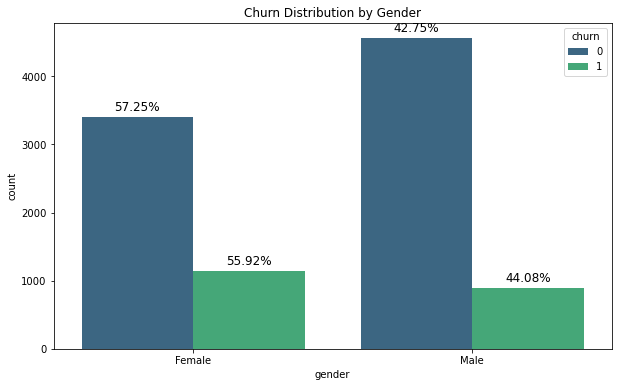

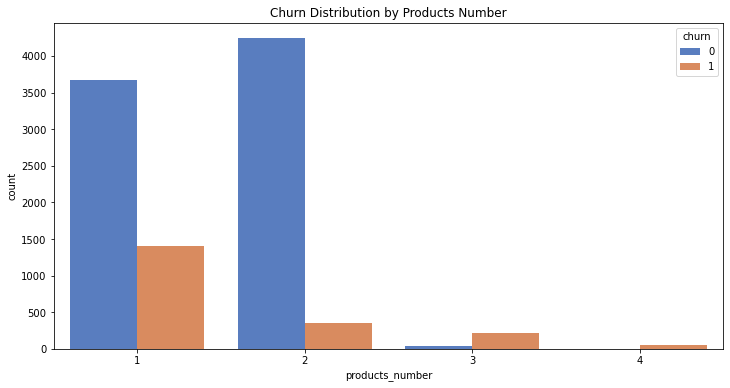

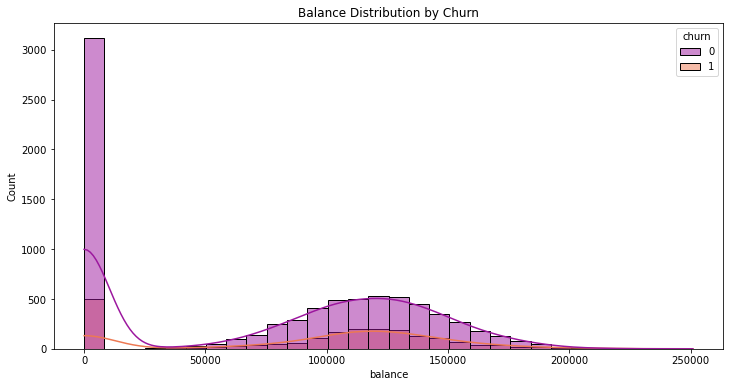

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart for Gender vs. Churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='churn', data=df, palette='viridis')

# Calculate percentages for each gender and Churn group
percentage_0 = churn_0_data['gender'].value_counts(normalize=True) * 100
percentage_1 = churn_1_data['gender'].value_counts(normalize=True) * 100

# Add percentage annotations for each bar in Churn = 0
for i, p in enumerate(ax.patches[:2]):
    height = p.get_height()
    ax.annotate(f'{percentage_0.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Add percentage annotations for each bar in Churn = 1
for i, p in enumerate(ax.patches[2:]):
    height = p.get_height()
    ax.annotate(f'{percentage_1.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Churn Distribution by Gender')
plt.show()

# Bar Chart for Products Number vs. Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='products_number', hue='churn', data=df, palette='muted')
plt.title('Churn Distribution by Products Number')
plt.show()

# Histogram for Balance vs. Churn
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='balance', hue='churn', bins=30, kde=True, palette='plasma')
plt.title('Balance Distribution by Churn')
plt.show()



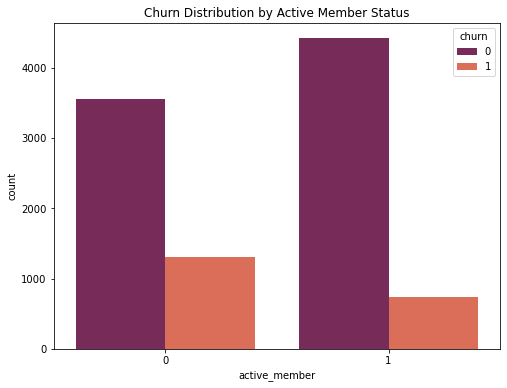

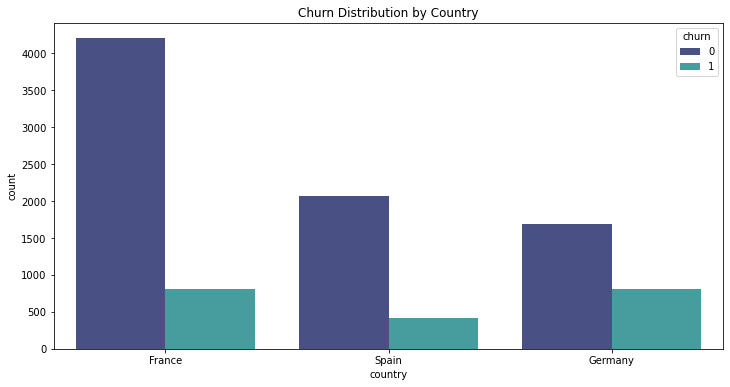

<Figure size 1152x576 with 0 Axes>

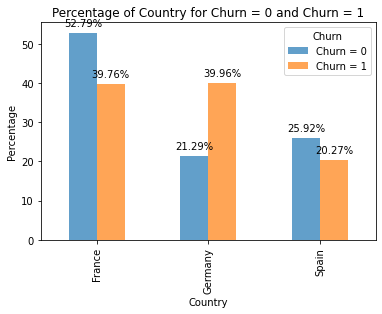

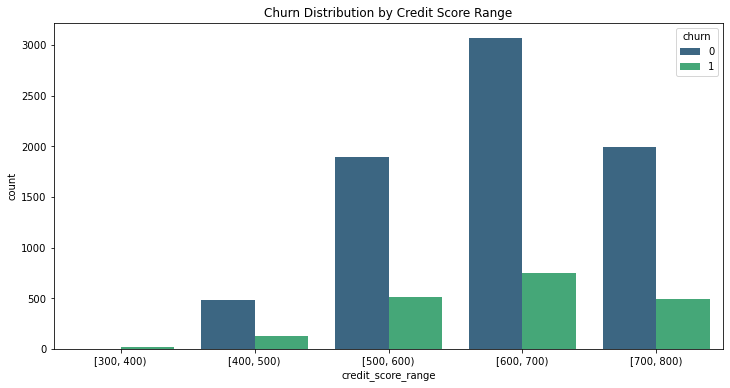

In [140]:
# Bar Chart for Active Member vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='active_member', hue='churn', data=df, palette='rocket')
plt.title('Churn Distribution by Active Member Status')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='country', hue='churn', data=df, palette='mako')
plt.title('Churn Distribution by Country')
plt.show()
# Filter data for Churn = 0 and Churn = 1
churn_0_data = df[df['churn'] == 0]
churn_1_data = df[df['churn'] == 1]

# Calculate percentage of each country within Churn = 0 and Churn = 1
churn_0_percentage = churn_0_data['country'].value_counts(normalize=True) * 100
churn_1_percentage = churn_1_data['country'].value_counts(normalize=True) * 100

# Combine the percentages into a single DataFrame
combined_percentage = pd.DataFrame({'Churn = 0': churn_0_percentage, 'Churn = 1': churn_1_percentage})

# Plotting
plt.figure(figsize=(16, 8))

# Bar chart with percentages
ax = combined_percentage.sort_index().plot(kind='bar', alpha=0.7)
plt.title('Percentage of Country for Churn = 0 and Churn = 1')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.legend(title='Churn')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Create a new categorical variable for credit score ranges
df['credit_score_range'] = pd.cut(df['credit_score'], bins=range(300, 851, 100), right=False)

# Bar Chart for Credit Score Range vs. Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='credit_score_range', hue='churn', data=df, palette='viridis')
plt.title('Churn Distribution by Credit Score Range')
plt.show()

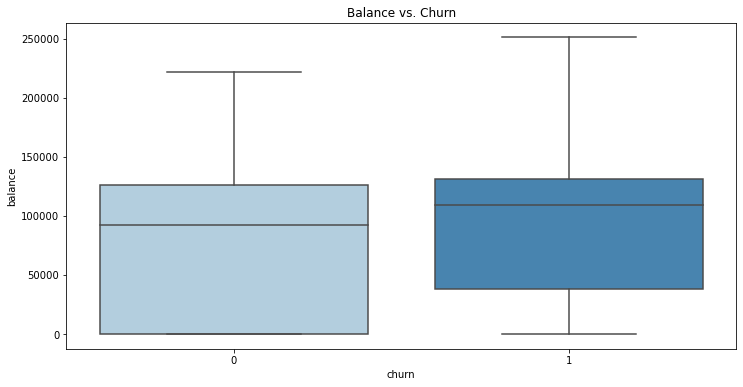

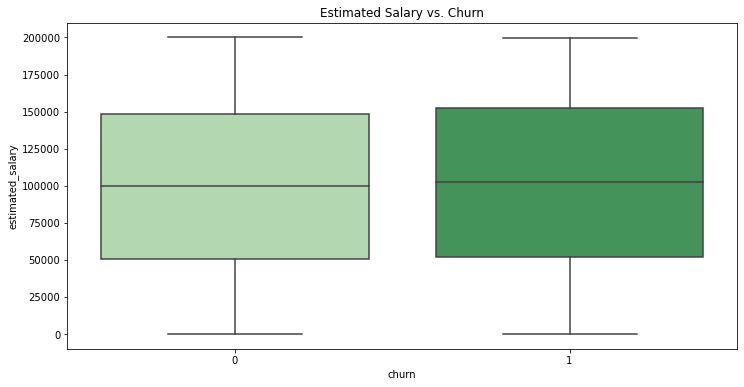

In [69]:
# Box Plot for Balance vs. Churn
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn', y='balance', data=df, palette='Blues')
plt.title('Balance vs. Churn')
plt.show()

# Box Plot for Estimated Salary vs. Churn
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn', y='estimated_salary', data=df, palette='Greens')
plt.title('Estimated Salary vs. Churn')
plt.show()

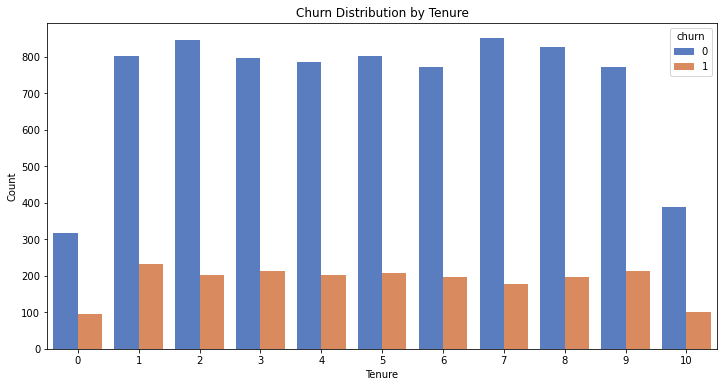

In [146]:
plt.figure(figsize=(12, 6))
sns.countplot(x='tenure', hue='churn', data=df, palette='muted')
plt.title('Churn Distribution by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

According to Dataset there are Churn 20.4% and Non-churn 79.6%
The 6 main factor that affects the target are 1. Age 2. Estimate salary 3. Credit score 4. Balance 5. Product number 6. Tenure 
according to the Feature Importance bar chart.
1.	Age Group
In Bar Chart for Age Range vs. Churn. The highest churn rate is observed in the 40-50 age group (39.57%), followed by the 50-60 age group (23.91%) and 20-30 age group (23.22%). Between age 30-60 years are 86.70% so we must focus on these target age group.
2.	Gender
The churn rate is higher for female customers (55.92%) compared to male customers (44.08%). This indicates that gender may play a role in customer churn, with female customers being more likely to churn.
3.	Product Number
The churn rate is higher for female customers (25.1%) compared to male customers (16.5%). This indicates that gender may play a role in customer churn, with female customers being more likely to churn.
4.	Balance
The distribution of account balances does not show a clear distinction between churned and retained customers.
5.	Active status
Customer activity status is another important factor. Active members appear to have a lower churn rate compared to inactive members. This suggests that engaged and active customers are more likely to stay with the bank.
6.	Country
Germany has the highest churn rate (39.96%), followed by France (39.96%) and Spain (20.27%). With Non-Churn of Germany is 21.29% while churn rate is 39.96%. So this suggests show that geographic location may impact customer churn, with customers in certain countries more prone to churn.
7.	Credit Score
The distribution of Credit Score does not show a clear distinction between churned and retained customers.
8.	Tenure
The distribution of Tenure does not show a clear distinction between churned and retained customers.
